In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
iris= load_iris()
X=iris.data
y=iris.target

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)

In [10]:
# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.11%


In [12]:
# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [13]:
# Optional: Visualize decision boundaries using PCA (for 2D visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
# Re-train SVM with PCA-transformed data
svm_model.fit(X_train_pca, y_train)

SVC(C=1, kernel='linear', random_state=42)

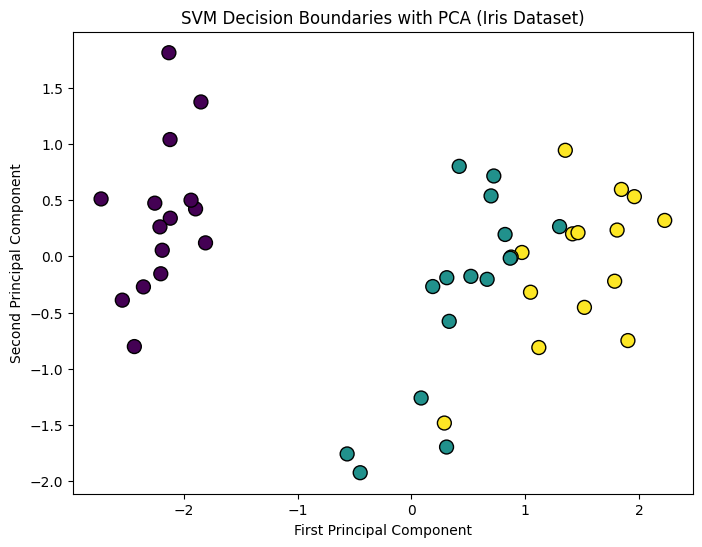

In [15]:
# Visualize decision boundaries
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title("SVM Decision Boundaries with PCA (Iris Dataset)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()